In [17]:
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import sys
work_path = Path(next((p for p in Path("__file__").resolve().parents if p.name == "Research"), None))
torchlib_path = str(work_path / Path("app/torch_libs"))
sys.path.append(torchlib_path)

from run_manager import RunManager, RunsManager, RunViewer


In [18]:
nb_path = Path().resolve()
# rm = RunManager(exp_path=nb_path)
# rm.ref_stats()
rv = RunViewer(exp_path=nb_path)
df_base = rv.fetch_results()

pass


In [66]:
df_res = df_base

cols = ["train_dataset", "train_num"]

df_uq = df_res.unique(cols, maintain_order=True).select(cols)

df_res_mf = None

for cond in df_uq.iter_rows(named=True):
    df_cond = df_res
    for k, v in cond.items():
        df_cond = df_cond.filter(pl.col(k) == v)
    
    max_fil = df_cond["fils"].max()
    # min_fil = df_cond["fils"].min()
    max_fil_vacc = df_cond.filter(pl.col("fils") == max_fil)["val_acc"].mean()
    
    df_cond = df_cond.with_columns(pl.lit(max_fil_vacc).alias("val_acc_mf"))
    
    if df_res_mf is None:
        df_res_mf = df_cond
    else:
        df_res_mf = pl.concat([df_res_mf, df_cond], how="vertical")
        
df_res_mf = df_res_mf.with_columns((1 - pl.col("val_acc")).alias("val_error"))

# df_res_mf = df_res_mf.with_columns((pl.col("val_acc") - pl.col("val_acc_mf")).alias("mf_diff"))
# df_res_mf = df_res_mf.with_columns((pl.col("val_acc_mf") - pl.col("val_acc")).alias("mf_error_diff"))
df_res_mf = df_res_mf.with_columns((pl.col("val_acc") / pl.col("val_acc_mf")).alias("mf_diff") - 1)
# df_res_mf = df_res_mf.with_columns((pl.col("mf_error_diff") / pl.col("val_error")).alias("error_raise_rate"))

df_res_mf = df_res_mf.filter(pl.col("fils") == 1)

df_res_f1_b = df_res_mf

# df_res_mf = df_res_mf.filter(pl.col("train_dataset") == "mnist_train")
# df_res_mf = df_res_mf.filter(pl.col("train_num") == 1000)
df_res_mf = df_res_mf.sort("val_acc", descending=True)



    
display(df_res_mf)





run_id,model_arc,train_dataset,val_dataset,num_classes,train_trans,val_trans,train_num,val_num,epochs,max_lr,batch_size,iters/epoch,base_fils,fils,ensembles,params,loss_func,optimizer,scheduler,lr,epoch,train_loss,train_acc,val_loss,val_acc,val_acc_mf,val_error,mf_diff
i64,str,str,str,i64,str,str,i64,i64,i64,f64,i64,i64,i64,i64,i64,i64,str,str,str,f64,i64,f64,f64,f64,f64,f64,f64,f64
6,"""models.gitresnet_ee resnet18""","""mnist_train""","""mnist_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,10000,1000,0.0005,128,8,32,1,1024,3062784,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.001932,1.0,0.037977,0.9269,0.9327,0.0731,-0.006219
54,"""models.gitresnet_ee resnet18""","""cifar10_train""","""cifar10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,10000,1000,0.0005,128,8,32,1,1024,3062784,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.011546,1.0,0.245912,0.5155,0.4033,0.4845,0.278205
150,"""models.gitresnet_ee resnet18""","""stl10_train""","""stl10_val""",10,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,8000,1000,0.0005,128,8,32,1,1024,3062784,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.012897,1.0,0.242208,0.505625,0.392,0.494375,0.28986
102,"""models.gitresnet_ee resnet18""","""cifar100_train""","""cifar100_val""",100,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,10000,1000,0.0005,128,8,32,1,1024,3892224,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.017181,1.0,0.665263,0.1825,0.1183,0.8175,0.542688
276,"""models.gitresnet_ee resnet18""","""pets_train""","""pets_val""",37,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,3669,1000,0.0005,128,8,32,1,1024,3311616,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.028096,1.0,0.554072,0.176342,0.121286,0.823658,0.453933
186,"""models.gitresnet_ee resnet18""","""tiny-imagenet_train""","""tiny-imagenet_val""",200,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,10000,1000,0.0005,128,8,32,1,1024,4813824,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.010666,1.0,1.007629,0.0546,0.0353,0.9454,0.546742
234,"""models.gitresnet_ee resnet18""","""cars_train""","""cars_val""",196,"""[Resize(size=(32, 32), interpo…","""[Resize(size=(32, 32), interpo…",1000,8041,1000,0.0005,128,8,32,1,1024,4776960,"""CrossEntropyLoss()""","""Adam ( Parameter Group 0 a…","""CosineAnnealingLR ( T_max = 10…",1.2337e-9,1000,0.011179,1.0,1.126742,0.031712,0.022261,0.968288,0.424581


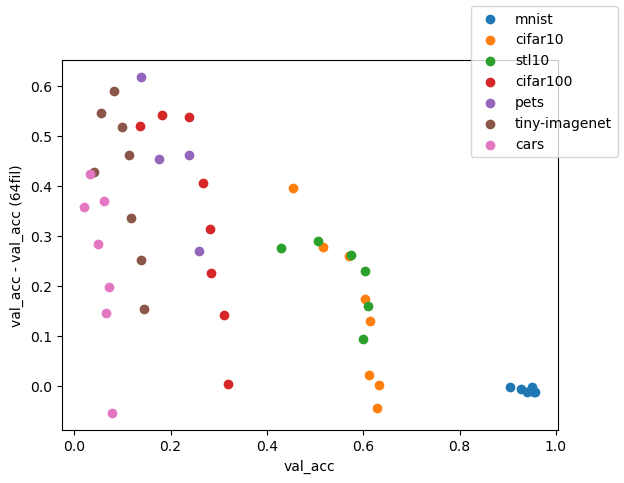

In [73]:
df_res_f1 = df_res_f1_b.sort("val_error")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "mnist_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_dataset") == "stl10_train")
# df_res_f1 = df_res_f1.filter(pl.col("train_num") == 1000)
# x = df_res_f1["val_acc_mf"]
# y = df_res_f1["mf_diff"]

fig, ax = plt.subplots()

# ext_col = "train_num"
ext_col = "train_dataset"
x_col = "val_acc"
y_col = "mf_diff"

for ds in df_res_f1[ext_col].unique(maintain_order=True):
    df_res_ft = df_res_f1.filter(pl.col(ext_col) == ds)
    x = df_res_ft[x_col]
    y = df_res_ft[y_col]

    ax.scatter(x, y, label=ds[:-6])

ax.set_xlabel("val_acc")
ax.set_ylabel("val_acc - val_acc (64fil)")
ax.grid()

# DS数示す
fig.legend()
fig.show()

